# Modelo de Árboles y Bosques de Decisión Aleatorios

## Árbol de Decisión

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [13]:
df.rename(columns={'Na_to_K': 'Sodium_to_Potassium' , 'BP' : 'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype('int')
age_counts = df['Age'].value_counts()
top_ages = age_counts.head(5)
df_2 = pd.DataFrame({'Age': top_ages.index, 'Count': top_ages.values})
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


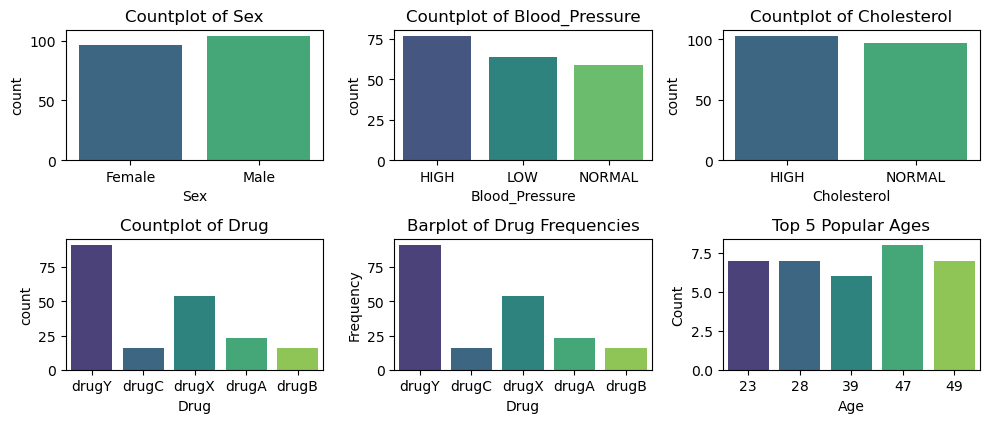

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 3, 1)
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Countplot of Sex')

plt.subplot(3, 3, 2)
sns.countplot(x='Blood_Pressure', data=df, palette='viridis')
plt.title('Countplot of Blood_Pressure')

plt.subplot(3, 3, 3)  # Corrected subplot position
sns.countplot(x='Cholesterol', data=df, palette='viridis')
plt.title('Countplot of Cholesterol')

plt.subplot(3, 3, 4)
sns.countplot(x='Drug', data=df, palette='viridis')
plt.title('Countplot of Drug')

plt.subplot(3, 3, 5)
sns.countplot(x='Drug', data=df, palette='viridis')
plt.title('Barplot of Drug Frequencies')
plt.xlabel('Drug')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
sns.barplot(x='Age', y='Count', data=df_2, palette='viridis')
plt.title('Top 5 Popular Ages')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


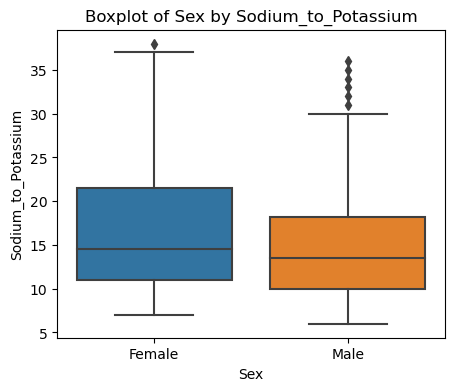

In [15]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

In [16]:
input = df.iloc[:, :-1]
Target = df.iloc[:, -1]
le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholesterol = LabelEncoder()
input['Sex'] = le_sex.fit_transform(input['Sex'])
input['Blood_Pressure'] = le_BP.fit_transform(input['Blood_Pressure'])
input['Cholesterol'] = le_cholesterol.fit_transform(input['Cholesterol'])
input

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,0,0,0,25
1,47,1,1,0,13
2,47,1,1,0,10
3,28,0,2,0,8
4,61,0,1,0,18
...,...,...,...,...,...
195,56,0,1,0,12
196,16,1,1,0,12
197,52,1,2,0,10
198,23,1,2,1,14


In [17]:
X_train, X_test, y_train, y_test = train_test_split(input, Target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", round(accuracy*100,1) )

Model Accuracy: 98.3


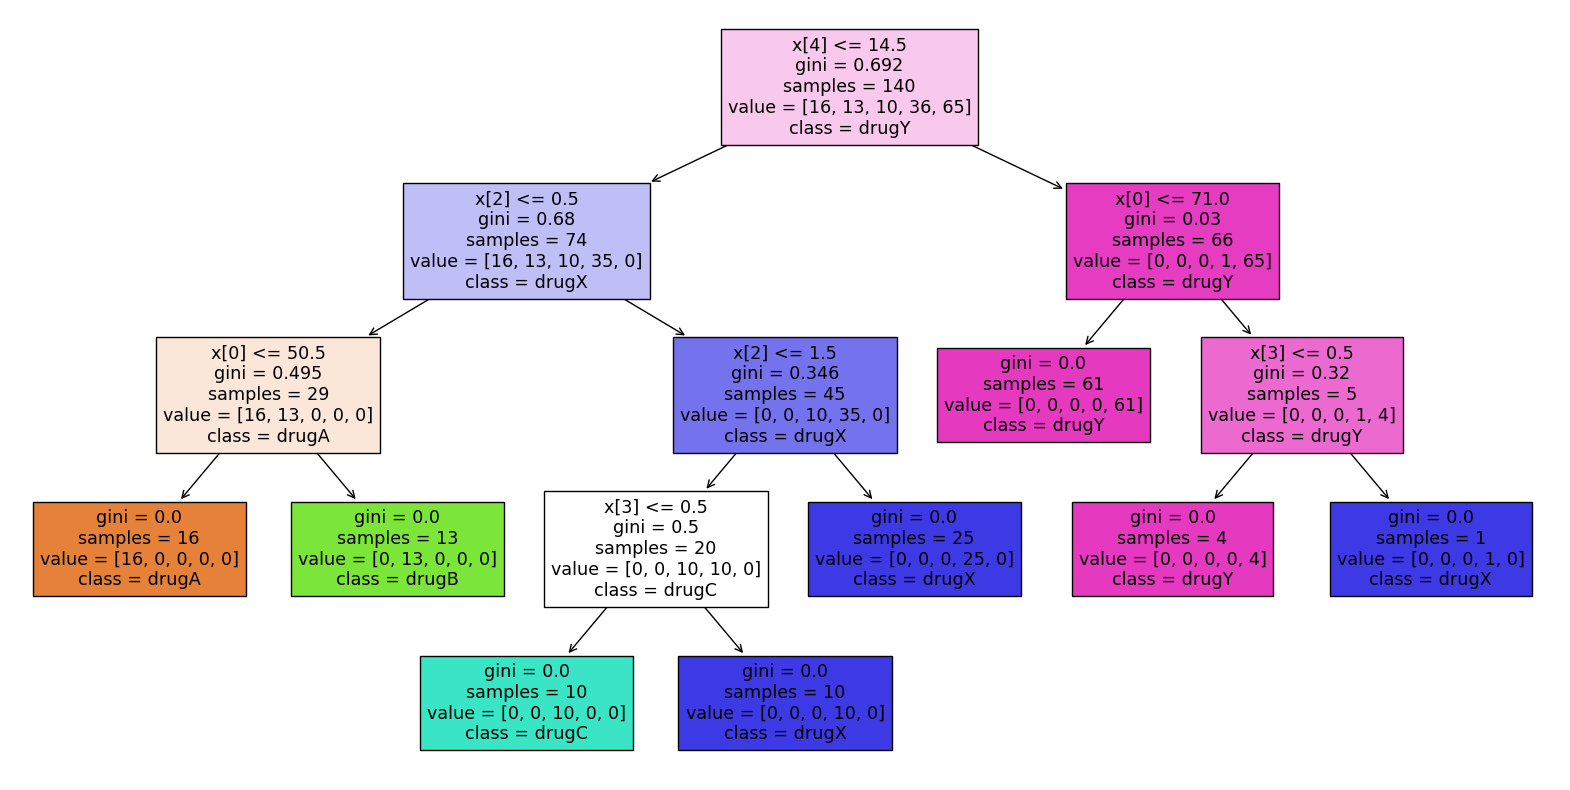

In [18]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)  
plt.figure(figsize=(20,10))
plot_tree(clf, class_names=unique_classes, filled=True)
plt.show()

In [19]:
X = np.array(['20', 'Male', 'LOW', 'LOW', '10'])
label = LabelEncoder()
X = label.fit_transform(X)

y_pred = clf.predict(X.reshape(1, -1))
y_pred

array(['drugX'], dtype=object)

## Bosque Aleatorio

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Entrenamos el modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Precisión del modelo Random Forest
rf_accuracy = rf_clf.score(X_test, y_test)
print("Random Forest Accuracy:", round(rf_accuracy*100,1))

Random Forest Accuracy: 100.0


In [22]:
# Comparación de Precisión entre Modelos
print(f"Decision Tree Accuracy: {round(accuracy*100,1)}%")
print(f"Random Forest Accuracy: {round(rf_accuracy*100,1)}%")

Decision Tree Accuracy: 98.3%
Random Forest Accuracy: 100.0%


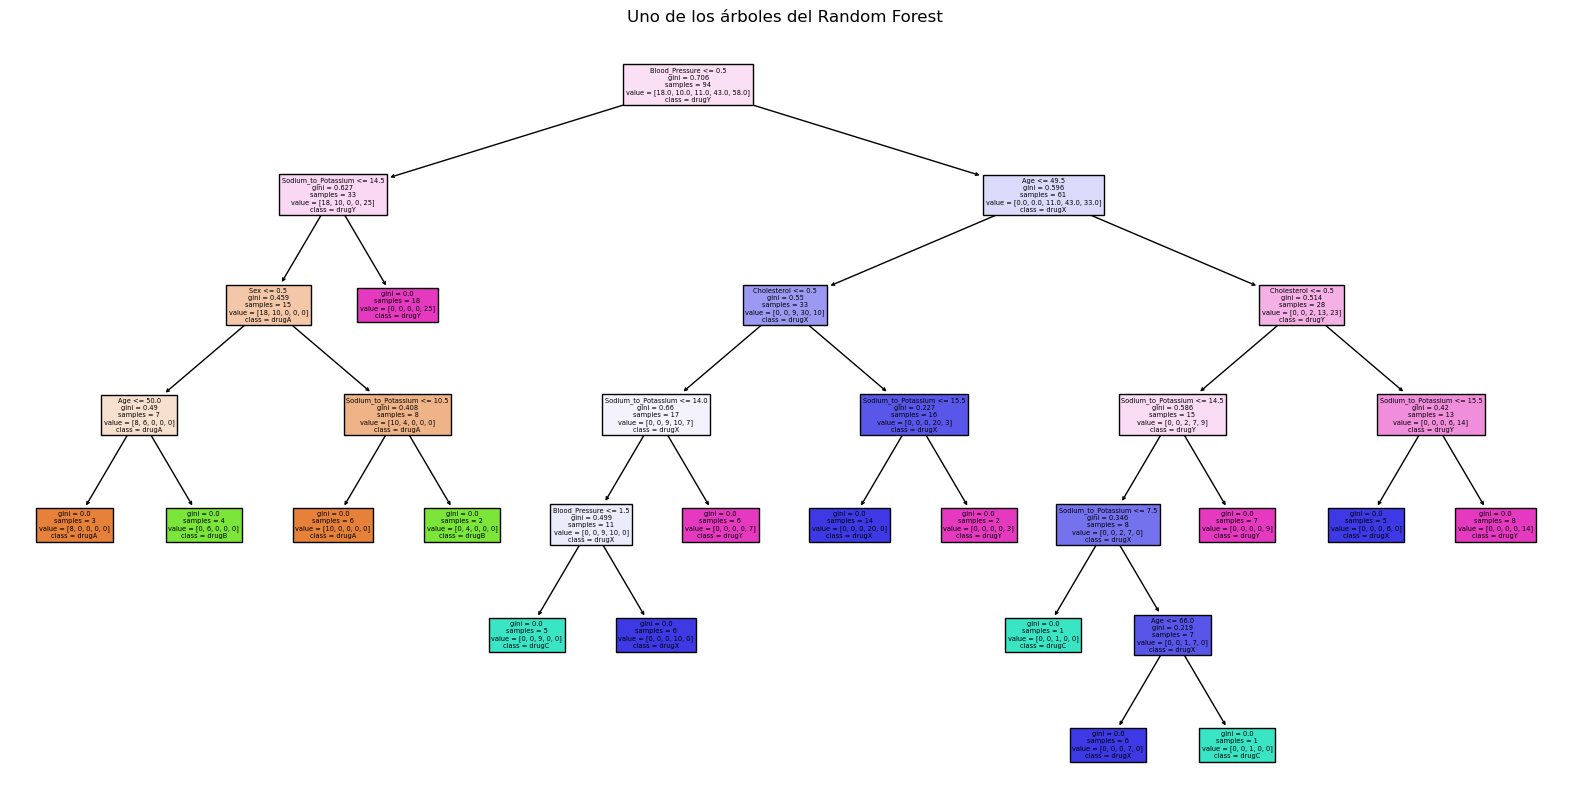

In [23]:
# Mostramos uno de los árboles del bosque (por ejemplo, el primero)
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], 
          feature_names=input.columns, 
          class_names=np.unique(y_train), 
          filled=True)
plt.title("Uno de los árboles del Random Forest")
plt.show()

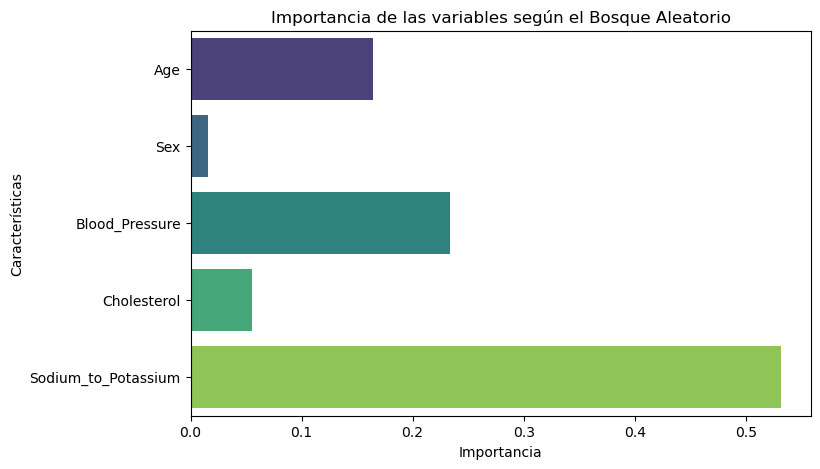

In [24]:
importances = rf_clf.feature_importances_
features = input.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Importancia de las variables según el Bosque Aleatorio')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()
